In [1]:
#  decision tree on fraud check dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("F:\\excelR\\assignments\\decision tree\\Fraud_check.csv")

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df=df.rename({'Marital.Status':'Marital_Status'},axis=1)
df=df.rename({'Taxable.Income':'Taxable_Income'},axis=1)
df=df.rename({'City.Population':'population'},axis=1)
df=df.rename({'Work.Experience':'experience'},axis=1)

In [6]:
df

,Undergrad,Marital_Status,Taxable_Income,population,experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [7]:
tax_income=[]
for value in df['Taxable_Income']:
    if value<=30000:
         tax_income.append('risky')
    else:
           tax_income.append('good')
df['tax']= tax_income

In [8]:
df.head()

,Undergrad,Marital_Status,Taxable_Income,population,experience,Urban,tax
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good


In [9]:
df=df.drop(['Taxable_Income'],axis=1)

In [10]:
df

,Undergrad,Marital_Status,population,experience,Urban,tax
0,NO,Single,50047,10,YES,good
1,YES,Divorced,134075,18,YES,good
2,NO,Married,160205,30,YES,good
3,YES,Single,193264,15,YES,good
4,NO,Married,27533,28,NO,good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,good
596,YES,Divorced,55369,2,YES,good
597,NO,Divorced,154058,0,YES,good
598,YES,Married,180083,17,NO,good


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelencoder=LabelEncoder()

In [18]:
df.iloc[:,0]=labelencoder.fit_transform(df.iloc[:,0])
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1])
df.iloc[:,-2]=labelencoder.fit_transform(df.iloc[:,-2])
df.iloc[:,-1]=labelencoder.fit_transform(df.iloc[:,-1])

In [19]:
df

,Undergrad,Marital_Status,population,experience,Urban,tax
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [24]:
x=df.iloc[:,0:5]
y=df.iloc[:,-1]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

### model building

### building decision tree using entroy crietria

In [28]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

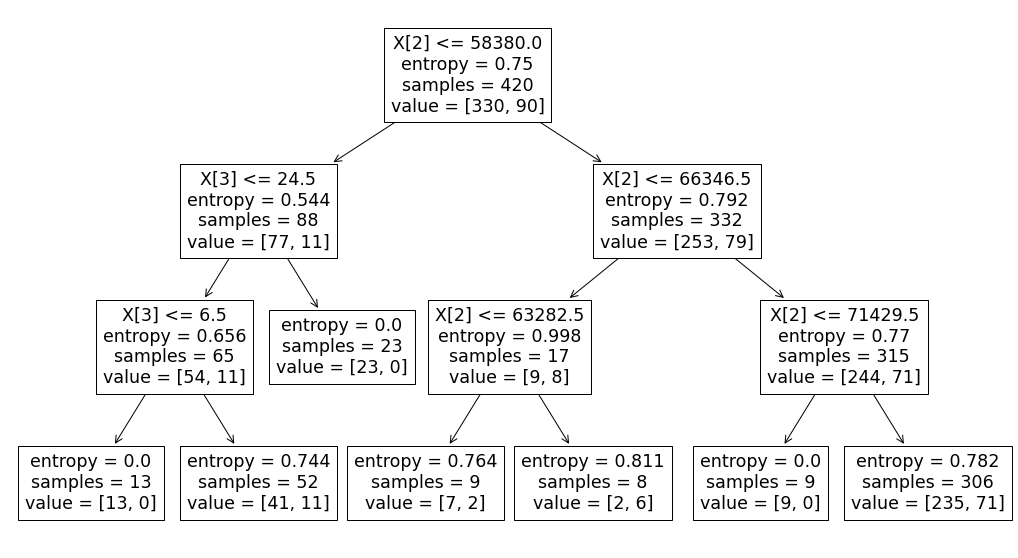

In [30]:
# plotting decision tree
plt.figure(figsize=(18,10))
tree.plot_tree(model);

In [31]:
model.get_n_leaves()

7

In [32]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    175
1      5
dtype: int64

In [33]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [34]:
pd.crosstab(y_test,preds)

col_0,0,1
tax,,
0,141,5
1,34,0


In [35]:
np.mean(preds==y_test)

0.7833333333333333

In [36]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       175
           1       0.00      0.00      0.00         5

    accuracy                           0.78       180
   macro avg       0.48      0.40      0.44       180
weighted avg       0.94      0.78      0.85       180



### building decision tree using gini creteria

In [37]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [38]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7833333333333333